In [1]:

!python -m pip install kagglehub
!python -m pip install fastparquet


In [2]:
import kagglehub

path = kagglehub.dataset_download("mauriciy/daily-spanish-gas-prices")

print("Path to dataset files:", path)

c:\Users\azmyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5


In [3]:
import os
folder_path = r"C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5"
print(os.listdir(folder_path))



['spanish_gas_prices.parquet']


In [4]:
import pandas as pd

file_path = r"C:\Users\azmyn\.cache\kagglehub\datasets\mauriciy\daily-spanish-gas-prices\versions\5\spanish_gas_prices.parquet"

# Load the Parquet file
data = pd.read_parquet(file_path)

# Display the first few rows of the dataset
print(data.head())


   station_id        date gasoline_95E5 gasoline_95E5_premium gasoline_95E10  \
0       15614  2023-07-29          None                  None           None   
1        9021  2023-07-29   1.528000000                  None           None   
2       14984  2023-07-29   1.644000000                  None           None   
3       14743  2023-07-29   1.540000000                  None           None   
4       12614  2023-07-29   1.548000000                  None           None   

  gasoline_98E5 gasoline_98E10     diesel_A     diesel_B diesel_premium  ...  \
0          None           None  1.530000000         None           None  ...   
1          None           None  1.379000000  1.140000000           None  ...   
2   1.776000000           None  1.495000000         None    1.561000000  ...   
3          None           None  1.370000000         None    1.420000000  ...   
4          None           None  1.448000000         None           None  ...   

  road_side restriction sender        

In [5]:
print(data.columns)
print(data.describe())
print(data.isnull().sum())



Index(['station_id', 'date', 'gasoline_95E5', 'gasoline_95E5_premium',
       'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 'diesel_A',
       'diesel_B', 'diesel_premium', 'bioetanol', 'biodiesel', 'lpg', 'cng',
       'lng', 'hydrogen', 'name', 'address', 'town', 'zip_code', 'longitude',
       'latitude', 'road_side', 'restriction', 'sender', 'schedule',
       'region_id', 'region_name', 'province_id', 'province_name',
       'municipality_id', 'municipality_name'],
      dtype='object')
         station_id     longitude      latitude     region_id   province_id  \
count  5.660732e+07  5.660625e+07  5.660625e+07  5.660732e+07  5.660732e+07   
mean   6.415479e+03 -3.307554e+00  3.966804e+01  7.909024e+00  2.514566e+01   
std    4.037010e+03  4.015035e+00  3.173154e+00  4.539831e+00  1.445732e+01   
min    1.000000e+00 -1.801194e+01 -4.038306e+00  1.000000e+00  1.000000e+00   
25%    2.990000e+03 -5.497333e+00  3.807428e+01  4.000000e+00  1.200000e+01   
50%    6.025000e+03 -3

In [6]:
filtered_data = data[data['region_name'] == 'Madrid']
print(filtered_data.head())


     station_id        date gasoline_95E5 gasoline_95E5_premium  \
37        14661  2023-07-29   1.569000000                  None   
39        14740  2023-07-29   1.569000000                  None   
44         3075  2023-07-29   1.709000000                  None   
109        3148  2023-07-29   1.709000000                  None   
127       13525  2023-07-29   1.589000000                  None   

    gasoline_95E10 gasoline_98E5 gasoline_98E10     diesel_A     diesel_B  \
37            None          None           None  1.369000000         None   
39            None          None           None  1.419000000         None   
44            None   1.854000000           None  1.559000000         None   
109           None          None           None  1.579000000  1.329000000   
127           None          None           None  1.399000000         None   

    diesel_premium  ... road_side restriction sender  \
37            None  ...         D           P     dm   
39     1.429000000  ..

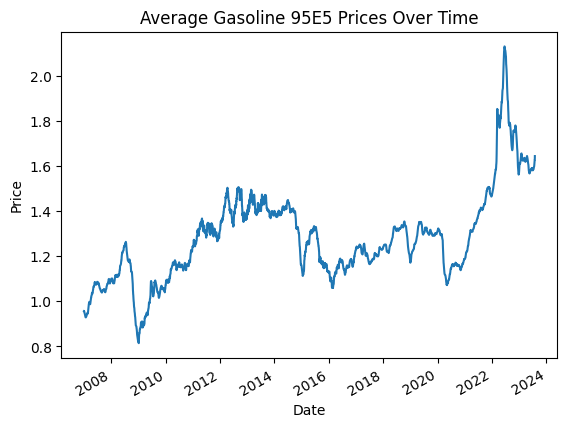

In [7]:
import matplotlib.pyplot as plt

# Example for Gasoline 95E5
data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' is datetime
data.groupby('date')['gasoline_95E5'].mean().plot()
plt.title('Average Gasoline 95E5 Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [8]:
# Check unique station names to confirm where "GALP" appears
unique_station_names = data['name'].unique()
print("Unique station names:", unique_station_names)

# Filter the dataset for stations with "GALP" in the name
galp_stations = data[data['name'].str.contains('GALP', case=False, na=False)]

# Check the number of GALP stations
print(f"Number of GALP stations: {galp_stations.shape[0]}")

# Display the first few rows of GALP stations
print(galp_stations.head())



Unique station names: ['ALSA' 'COOP. Nª Sª DE LA ASUNCION DE SONEJA' 'CEPSA' ... 'E.S. SARASA I'
 'E.S. SARASA II' 'BARCELONA M.A.C']
Number of GALP stations: 2940673
    station_id       date gasoline_95E5 gasoline_95E5_premium gasoline_95E10  \
6         7071 2023-07-29   1.784000000                  None           None   
13        3748 2023-07-29   1.689000000                  None           None   
15        1865 2023-07-29   1.589000000           1.639000000           None   
25        7462 2023-07-29   1.724000000                  None           None   
26        3499 2023-07-29   1.724000000                  None           None   

   gasoline_98E5 gasoline_98E10     diesel_A     diesel_B diesel_premium  ...  \
6    1.924000000           None  1.614000000         None    1.704000000  ...   
13   1.829000000           None  1.534000000         None    1.584000000  ...   
15          None           None  1.479000000         None    1.549000000  ...   
25   1.864000000           N

In [9]:
# Display the 'name' column of filtered GALP data
print(galp_stations['name'].unique())


['GALP' 'GALP ENERGIA' 'GALP&GO' 'GALP DISTRIBUCION OIL ESPAÑA, S.A.U.'
 'GALP - AMERICAN PETROL' 'GALP/3CAMINOS-VALENCIA' 'GALP-3 CAMINOS'
 'GALP LA JUNQUERA' 'EESS DE CABANES GALP 40 PIES' 'GALP-3CAMINOS UTIEL'
 'GALP (E.S. ANTUNEZ)' 'GALP ARRIONDAS' 'GALP ENERGIA ESPAÑA, S.A.U.']


In [10]:
galp_stations = data[data['name'].str.contains('GALP', case=True, na=False)]
print(galp_stations['name'].unique())


['GALP' 'GALP ENERGIA' 'GALP&GO' 'GALP DISTRIBUCION OIL ESPAÑA, S.A.U.'
 'GALP - AMERICAN PETROL' 'GALP/3CAMINOS-VALENCIA' 'GALP-3 CAMINOS'
 'GALP LA JUNQUERA' 'EESS DE CABANES GALP 40 PIES' 'GALP-3CAMINOS UTIEL'
 'GALP (E.S. ANTUNEZ)' 'GALP ARRIONDAS' 'GALP ENERGIA ESPAÑA, S.A.U.']


In [11]:
false_positives = galp_stations[~galp_stations['name'].str.match(r'\bGALP\b', case=False)]
print(false_positives)


          station_id       date gasoline_95E5 gasoline_95E5_premium  \
9020           12613 2023-07-29   1.799000000                  None   
17248          12613 2023-07-28   1.729000000                  None   
27404          12613 2023-07-27   1.729000000                  None   
39735          12613 2023-07-26   1.729000000                  None   
50721          12613 2023-07-25   1.729000000                  None   
...              ...        ...           ...                   ...   
35809571       12613 2013-12-09   1.435000000                  None   
35821790       12613 2013-12-08   1.435000000                  None   
35830884       12613 2013-12-07   1.435000000                  None   
35840672       12613 2013-12-06   1.435000000                  None   
35849560       12613 2013-12-05   1.435000000                  None   

         gasoline_95E10 gasoline_98E5 gasoline_98E10     diesel_A  \
9020               None          None           None  1.599000000   
17248    

In [12]:
print(false_positives['name'].unique())


['EESS DE CABANES GALP 40 PIES']


In [13]:
print(galp_stations[['region_name', 'municipality_name', 'schedule']].head())


             region_name municipality_name          schedule
6              Andalucia          Marbella          L-D: 24H
13  Comunidad Valenciana         Elche/Elx  L-D: 06:00-22:00
15              Cataluña          Terrassa          L-D: 24H
25             Andalucia           Sevilla          L-D: 24H
26  Comunidad Valenciana             Nules  L-D: 06:00-22:00


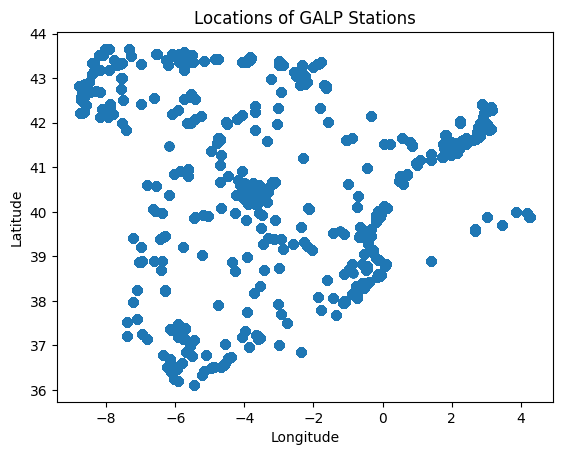

In [14]:
import matplotlib.pyplot as plt

plt.scatter(galp_stations['longitude'], galp_stations['latitude'], alpha=0.5)
plt.title('Locations of GALP Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [15]:
# Filter for Madrid in region_name, municipality_name, or town
madrid_stations = galp_stations[
    (galp_stations['region_name'].str.contains('Madrid', case=False, na=False)) |
    (galp_stations['municipality_name'].str.contains('Madrid', case=False, na=False)) |
    (galp_stations['town'].str.contains('Madrid', case=False, na=False))
]

# Display the first few rows of stations in Madrid or surrounding area
print(madrid_stations[['name', 'town', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


      name               town region_name  municipality_name  longitude  \
44    GALP          VALDEMORO      Madrid          Valdemoro  -3.692694   
441   GALP              PARLA      Madrid              Parla  -3.763778   
1005  GALP  ALCALA DE HENARES      Madrid  Alcalá de Henares  -3.388028   
1125  GALP            COSLADA      Madrid            Coslada  -3.533444   
1557  GALP           BUTARQUE      Madrid            Leganés  -3.797444   

       latitude  
44    40.185500  
441   40.251194  
1005  40.494167  
1125  40.432944  
1557  40.346278  


In [16]:
# Define bounds for the Madrid Metro Area
latitude_bounds = (39.8, 41.2)  # Latitude range
longitude_bounds = (-4.5, -2.5)  # Longitude range

# Filter stations within the Madrid Metro Area
madrid_metro_stations = galp_stations[
    (galp_stations['latitude'] >= latitude_bounds[0]) &
    (galp_stations['latitude'] <= latitude_bounds[1]) &
    (galp_stations['longitude'] >= longitude_bounds[0]) &
    (galp_stations['longitude'] <= longitude_bounds[1])
]

# Display the first few rows
print(madrid_metro_stations[['name', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


      name         region_name  municipality_name  longitude   latitude
44    GALP              Madrid          Valdemoro  -3.692694  40.185500
441   GALP              Madrid              Parla  -3.763778  40.251194
705   GALP  Castilla la Mancha          Carranque  -3.886361  40.182056
780   GALP  Castilla la Mancha        Guadalajara  -3.191000  40.634778
1005  GALP              Madrid  Alcalá de Henares  -3.388028  40.494167


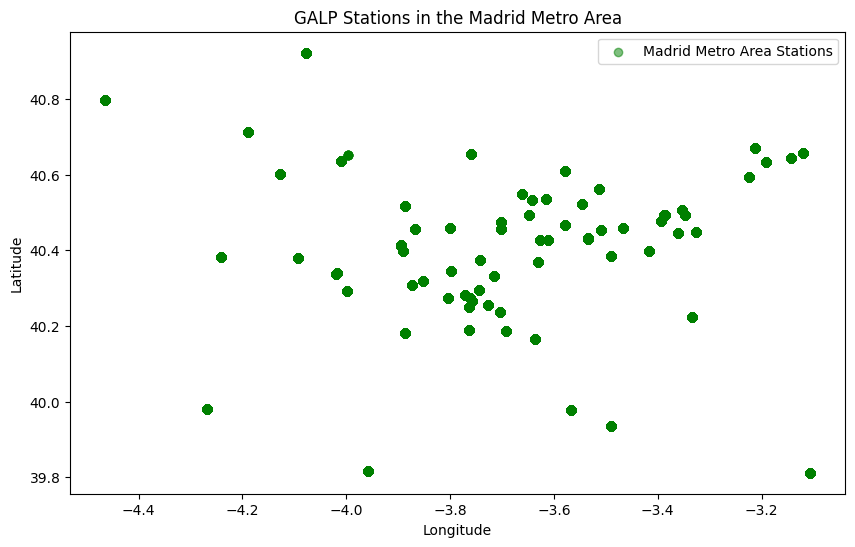

In [17]:
import matplotlib.pyplot as plt

# Plot stations in the Madrid Metro Area
plt.figure(figsize=(10, 6))
plt.scatter(madrid_metro_stations['longitude'], madrid_metro_stations['latitude'], alpha=0.5, color='green', label='Madrid Metro Area Stations')
plt.title('GALP Stations in the Madrid Metro Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [18]:
# Define updated bounds for the Madrid Metro Area
latitude_bounds = (39.8, 41.2)  # Latitude range
longitude_bounds = (-4.5, -2.5)  # Longitude range



In [19]:
# Filter all stations within the specified bounds
madrid_metro_all_stations = data[
    (data['latitude'] >= latitude_bounds[0]) &
    (data['latitude'] <= latitude_bounds[1]) &
    (data['longitude'] >= longitude_bounds[0]) &
    (data['longitude'] <= longitude_bounds[1])
]

# Display the first few rows
print(madrid_metro_all_stations[['name', 'region_name', 'municipality_name', 'longitude', 'latitude']].head())


           name         region_name    municipality_name  longitude   latitude
37   STORE FUEL              Madrid    Torrejón de Ardoz  -3.461778  40.455806
39    BALLENOIL              Madrid    Daganzo de Arriba  -3.463556  40.541000
44         GALP              Madrid            Valdemoro  -3.692694  40.185500
100      REPSOL  Castilla la Mancha             Illescas  -3.846250  40.126306
109       CEPSA              Madrid  Torrejón de Velasco  -3.725222  40.182444


C:\Users\azmyn\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


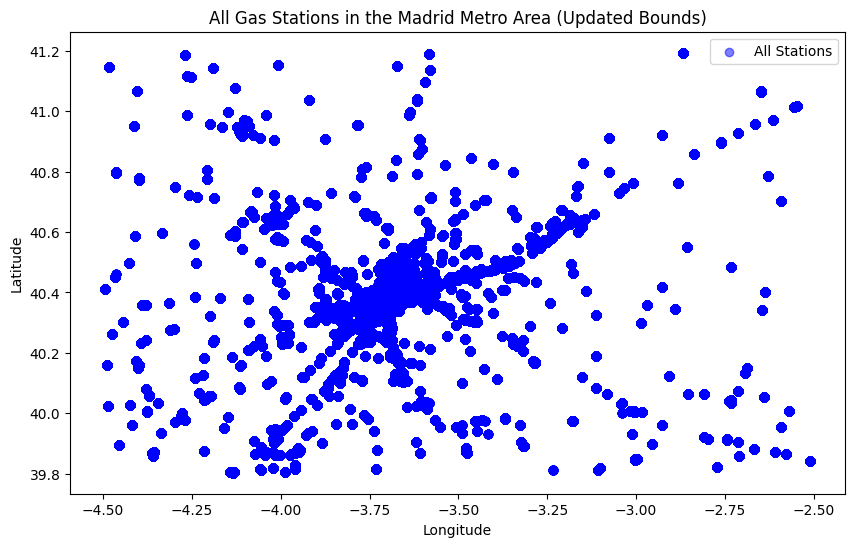

In [20]:


# Plot all stations
plt.figure(figsize=(10, 6))
plt.scatter(
    madrid_metro_all_stations['longitude'],
    madrid_metro_all_stations['latitude'],
    alpha=0.5,
    color='blue',
    label='All Stations'
)

# Add titles and labels
plt.title('All Gas Stations in the Madrid Metro Area (Updated Bounds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


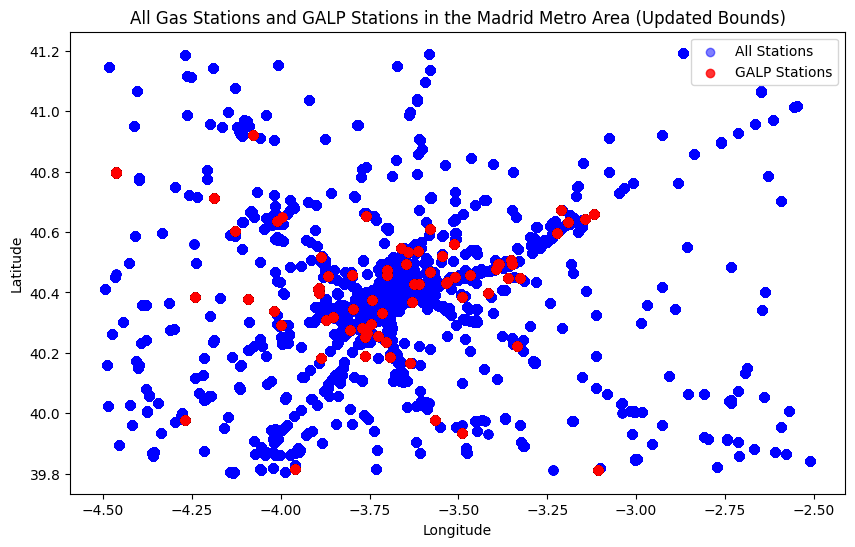

In [21]:
# Filter GALP stations within the specified bounds
galp_madrid_metro_stations = galp_stations[
    (galp_stations['latitude'] >= latitude_bounds[0]) &
    (galp_stations['latitude'] <= latitude_bounds[1]) &
    (galp_stations['longitude'] >= longitude_bounds[0]) &
    (galp_stations['longitude'] <= longitude_bounds[1])
]

# Plot all stations and overlay GALP stations
plt.figure(figsize=(10, 6))
plt.scatter(
    madrid_metro_all_stations['longitude'],
    madrid_metro_all_stations['latitude'],
    alpha=0.5,
    color='blue',
    label='All Stations'
)
plt.scatter(
    galp_madrid_metro_stations['longitude'],
    galp_madrid_metro_stations['latitude'],
    alpha=0.8,
    color='red',
    label='GALP Stations'
)

# Add titles and labels
plt.title('All Gas Stations and GALP Stations in the Madrid Metro Area (Updated Bounds)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [22]:
!python -m pip install plotly
!python -m pip install --upgrade nbformat

In [38]:
print(madrid_stations['name'].unique())


['GALP' 'GALP&GO']


In [36]:
# Define a mapping of keywords to major brands
brand_mapping = {
    "GALP": "GALP",
    "SHELL": "SHELL",
    "REPSOL": "REPSOL",
    "BP": "BP",
    "CEPSA": "CEPSA",
    "Q8": "Q8",
    "TOTAL": "TOTAL",
    "AVIA": "AVIA",
    # Add more as needed
}

# Function to map names to brands
def map_brand(name):
    for keyword, brand in brand_mapping.items():
        if keyword in name.upper():  # Convert to uppercase for case-insensitive matching
            return brand
    return "OTHER"  # Default category for unrecognized stations



In [37]:
# Apply the brand mapping
madrid_stations['brand'] = madrid_stations['name'].apply(map_brand)

# Display the first few rows to verify
print(madrid_stations[['name', 'brand']].head())


      name brand
44    GALP  GALP
441   GALP  GALP
1005  GALP  GALP
1125  GALP  GALP
1557  GALP  GALP


C:\Users\azmyn\AppData\Local\Temp\ipykernel_7084\747986862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_stations['brand'] = madrid_stations['name'].apply(map_brand)


In [35]:
# Count the number of stations for each brand
brand_counts = madrid_stations['brand'].value_counts()
print(brand_counts)


brand
GALP    288843
Name: count, dtype: int64


In [26]:
# Apply the brand mapping
madrid_stations['brand'] = madrid_stations['name'].apply(map_brand)

# Display the first few rows to verify
print(madrid_stations[['name', 'brand']].head())


      name brand
44    GALP  GALP
441   GALP  GALP
1005  GALP  GALP
1125  GALP  GALP
1557  GALP  GALP


C:\Users\azmyn\AppData\Local\Temp\ipykernel_7084\747986862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_stations['brand'] = madrid_stations['name'].apply(map_brand)


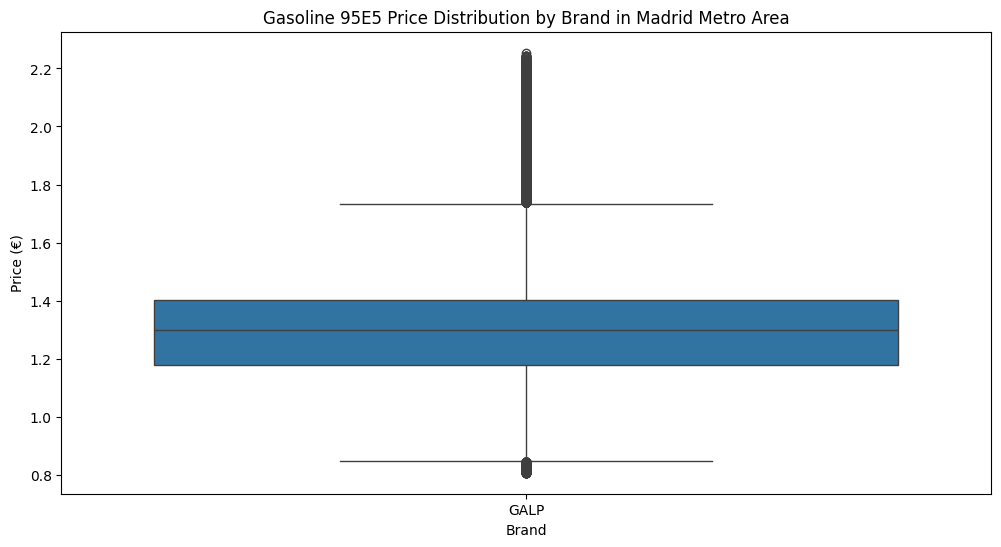

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot price distribution for Gasoline 95E5 by brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='gasoline_95E5', data=madrid_stations)
plt.title('Gasoline 95E5 Price Distribution by Brand in Madrid Metro Area')
plt.xlabel('Brand')
plt.ylabel('Price (€)')
plt.show()


In [28]:
# Identify high-priced outliers
outliers = madrid_stations[madrid_stations['gasoline_95E5'] > 2.0]
print(outliers[['name', 'brand', 'gasoline_95E5']])


         name brand gasoline_95E5
4331324  GALP  GALP   2.019000000
4333617  GALP  GALP   2.179000000
4338485  GALP  GALP   2.004000000
4338835  GALP  GALP   2.004000000
4341642  GALP  GALP   2.189000000
...       ...   ...           ...
5044183  GALP  GALP   2.019000000
5046622  GALP  GALP   2.019000000
5047533  GALP  GALP   2.009000000
5055215  GALP  GALP   2.009000000
5768809  GALP  GALP   2.019000000

[2883 rows x 3 columns]


brand
GALP    2883
Name: count, dtype: int64


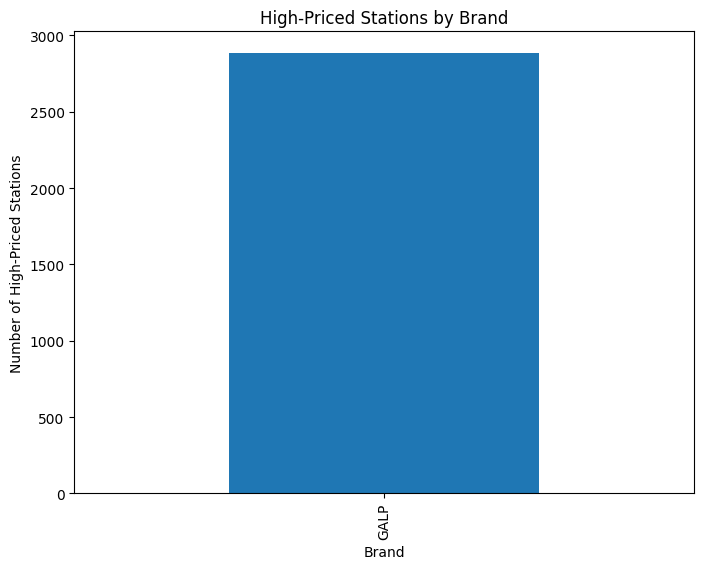

In [29]:
# Count high-priced stations by brand
outlier_counts = outliers['brand'].value_counts()
print(outlier_counts)

# Plot the counts
import matplotlib.pyplot as plt
outlier_counts.plot(kind='bar', figsize=(8, 6), title='High-Priced Stations by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of High-Priced Stations')
plt.show()


In [30]:
!python -m pip install folium


In [31]:
from folium.plugins import HeatMap

# High-priced station locations
high_price_locations = outliers[['latitude', 'longitude']].dropna()

# Create heatmap
high_price_map = folium.Map(location=[40.4168, -3.7038], zoom_start=10)
HeatMap(data=high_price_locations.values, radius=10).add_to(high_price_map)

# Save and view map
high_price_map.save("high_price_heatmap.html")


NameError: name 'folium' is not defined